<a href="https://colab.research.google.com/github/ParijatSutradhar04/ML_PracticeModels/blob/main/NSSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Visualization and Analysis of Dataset:**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from scipy.stats import skew

In [ ]:
data=pd.read_csv("data.csv")
data.info()
numeric_columns = data.select_dtypes(include=np.number)
# Calculate and print the Range, Mean, Median, and Standard Deviation for numeric_columns
range_values = numeric_columns.max() - numeric_columns.min()
mean_values = numeric_columns.mean()
median_values = numeric_columns.median()
std_deviation = numeric_columns.std()

print("Range:")
print(range_values)
print("\nMean:")
print(mean_values)
print("\nMedian:")
print(median_values)
print("\nStandard Deviation:")
print(std_deviation)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB
                                                               Values
Statistics                                                           
Range               P_STATUS                     0.000000
P_MASS  ...
Mean                P_STATUS                   3.000000
P_MASS    ...
Median              P_STATUS                   3.000000
P_MASS    ...
Standard Deviation  P_STATUS                    0.000000
P_MASS   ...


In [ ]:
data.describe()

,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_PERIOD,P_PERIOD_ERROR_MIN,...,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
count,4048.0,1598.000000,1467.000000,1467.000000,3139.000000,3105.000000,3105.000000,4048.000000,3.938000e+03,3.807000e+03,...,3786.000000,3.083000e+03,3281.000000,4048.000000,4048.000000,4048.000000,3721.000000,4048.000000,4048.000000,3978.000000
mean,3.0,798.384920,-152.292232,190.289692,4.191426,-0.483990,0.621867,2014.212945,2.309342e+03,-1.073631e+03,...,3.513348,1.771002e+35,0.440103,0.049654,0.034091,0.021986,0.261252,5.588647,323.089993,4.011385
std,0.0,1406.808654,783.366353,1082.061976,4.776830,1.409048,2.007592,3.704839,1.167012e+05,5.943181e+04,...,5.463171,6.952170e+36,0.074285,0.217256,0.181485,0.195731,0.131333,5.392733,965.084290,62.389968
min,3.0,0.019070,-24965.390000,0.000000,0.336300,-54.592700,0.000000,1989.000000,9.070629e-02,-3.650000e+06,...,0.002405,7.290000e-05,0.030707,0.000000,0.000000,0.000000,0.006768,0.000000,0.000000,0.004400
25%,3.0,26.548968,-79.457001,4.449592,1.569400,-0.526870,0.145730,2014.000000,4.497336e+00,-1.129000e-03,...,1.740762,5.264169e-01,0.420337,0.000000,0.000000,0.000000,0.196982,1.703920,3.628101,0.053000
50%,3.0,273.332080,-24.154928,25.108412,2.331680,-0.235410,0.325090,2016.000000,1.187053e+01,-9.390000e-05,...,2.568600,1.429118e+00,0.448357,0.000000,0.000000,0.000000,0.271192,2.667980,7.815324,0.102199
75%,3.0,806.488560,-4.392383,85.813561,3.553570,-0.134520,0.661390,2016.000000,4.186661e+01,-1.595000e-05,...,3.661581,2.641037e+00,0.472140,0.000000,0.000000,0.000000,0.303346,11.770500,149.379160,0.260507
max,3.0,17668.059000,0.270000,26630.808000,77.349000,0.450000,68.919080,2019.000000,7.300000e+06,3.200000e-02,...,104.112780,2.730000e+38,1.322542,1.000000,1.000000,2.000000,0.931208,77.349000,17668.059000,2500.000000


### Various planetary detection methods used over the years:

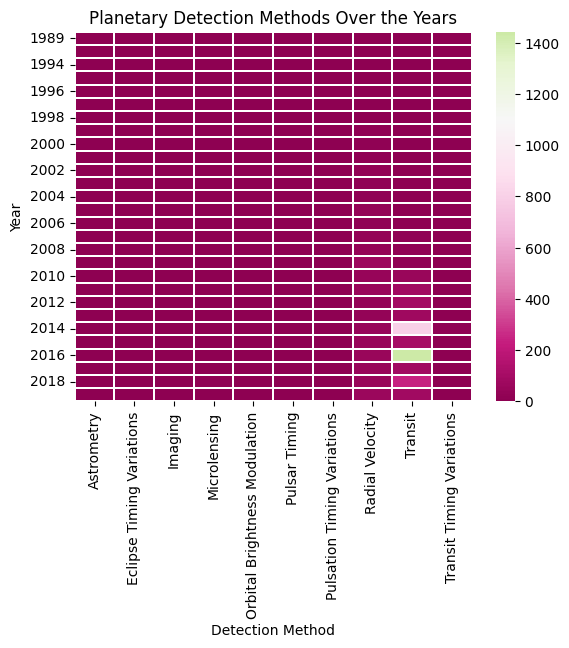

In [ ]:
pivot_data = data.pivot_table(index='P_YEAR', columns='P_DETECTION', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_data, cmap="PiYG", linewidth=.1, center=1100)
plt.title('Planetary Detection Methods Over the Years')
plt.xlabel('Detection Method')
plt.ylabel('Year')
plt.xticks(rotation=90)

# Show the heatmap
plt.show()

In [ ]:

import plotly.graph_objects as go

pivot_data = data.pivot_table(index='P_YEAR', columns='P_DETECTION', aggfunc='size', fill_value=0)

# Reset the index to have 'P_YEAR' as a regular column
pivot_data = pivot_data.reset_index()

# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    x=pivot_data.columns[1:],  # Exclude the 'P_YEAR' column
    y=pivot_data['P_YEAR'],
    z=pivot_data.iloc[:, 1:],  # Exclude the 'P_YEAR' column
    colorscale="PiYG",
    colorbar_title="Count",
))

fig.update_layout(
    title='Planetary Detection Methods Over the Years',
    xaxis_title='Detection Method',
    yaxis_title='Year',
    xaxis=dict(tickangle=-45),
)

fig.show()




### Planetary detection methods

In [ ]:
#separate DataFrames for each habitability score
uninhabitable_planets = data[data['P_HABITABLE'] == 0]
conservatively_habitable_planets = data[data['P_HABITABLE'] == 1]
optimistically_habitable_planets = data[data['P_HABITABLE'] == 2]

# Count the occurrences of each detection method for each habitability score
uninhabitable_counts = uninhabitable_planets['P_DETECTION'].value_counts()
conservatively_habitable_counts = conservatively_habitable_planets['P_DETECTION'].value_counts()
optimistically_habitable_counts = optimistically_habitable_planets['P_DETECTION'].value_counts()

# Identify the detection method(s) with the most identifications for each habitability score
most_identified_uninhabitable = uninhabitable_counts[uninhabitable_counts == uninhabitable_counts.max()]
most_identified_conservatively_habitable = conservatively_habitable_counts[conservatively_habitable_counts == conservatively_habitable_counts.max()]
most_identified_optimistically_habitable = optimistically_habitable_counts[optimistically_habitable_counts == optimistically_habitable_counts.max()]

# Print the results
print("Planetary Detection Methods with the most Uninhabitable Planet Identifications:")
print(most_identified_uninhabitable)

print("\nPlanetary Detection Methods with the most Conservatively Habitable Planet Identifications:")
print(most_identified_conservatively_habitable)

print("\nPlanetary Detection Methods with the most Optimistically Habitable Planet Identifications:")
print(most_identified_optimistically_habitable)


Planetary Detection Methods with the most Uninhabitable Planet Identifications:
Transit    3076
Name: P_DETECTION, dtype: int64

Planetary Detection Methods with the most Conservatively Habitable Planet Identifications:
Radial Velocity    12
Name: P_DETECTION, dtype: int64

Planetary Detection Methods with the most Optimistically Habitable Planet Identifications:
Transit    29
Name: P_DETECTION, dtype: int64


### Interquartile Range and the Skewness

In [ ]:

numeric_columns = data.select_dtypes(include=np.number)

# Calculate IQR for all numeric columns
iqr = numeric_columns.quantile(0.75) - numeric_columns.quantile(0.25)

# Print the IQR values for each column
print(iqr)


P_STATUS                   0.000000
P_MASS                   779.939592
P_MASS_ERROR_MIN          75.064618
P_MASS_ERROR_MAX          81.363969
P_RADIUS                   1.984170
                            ...    
P_HABITABLE                0.000000
P_ESI                      0.106363
P_RADIUS_EST              10.066580
P_MASS_EST               145.751059
P_SEMI_MAJOR_AXIS_EST      0.207507
Length: 98, dtype: float64


In [ ]:
# Calculate the skewness for all numeric columns
skewness = numeric_columns.skew()

# Print the skewness values
print("Skewness for Numeric Columns:")
print(skewness)

skewness

Skewness for Numeric Columns:
P_STATUS                  0.000000
P_MASS                    3.709352
P_MASS_ERROR_MIN        -23.147053
P_MASS_ERROR_MAX         19.064529
P_RADIUS                  2.957998
                           ...    
P_HABITABLE               9.321263
P_ESI                     1.039325
P_RADIUS_EST              1.545462
P_MASS_EST                5.797200
P_SEMI_MAJOR_AXIS_EST    28.395487
Length: 98, dtype: float64


P_STATUS                  0.000000
P_MASS                    3.709352
P_MASS_ERROR_MIN        -23.147053
P_MASS_ERROR_MAX         19.064529
P_RADIUS                  2.957998
                           ...    
P_HABITABLE               9.321263
P_ESI                     1.039325
P_RADIUS_EST              1.545462
P_MASS_EST                5.797200
P_SEMI_MAJOR_AXIS_EST    28.395487
Length: 98, dtype: float64

In [ ]:
# # Calculate the Fe to H Ratio and create a new feature
# data['Fe to H Ratio'] = data['Iron Atoms'] / data['Hydrogen Atoms']

## Subtask 2

In [ ]:
df = pd.read_csv("data.csv")
data=df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(93), int64(5), object(14)
memory usage: 3.5+ MB


In [ ]:
# Define the gravitational constant (units are in SI)
G = 6.67430e-11  # m^3/kg/s^2

# Calculate escape velocity for each exoplanet
df['P_Escape_Velocity_(m/s)'] = np.sqrt(2 * G * df['P_MASS'] / df['P_RADIUS'])


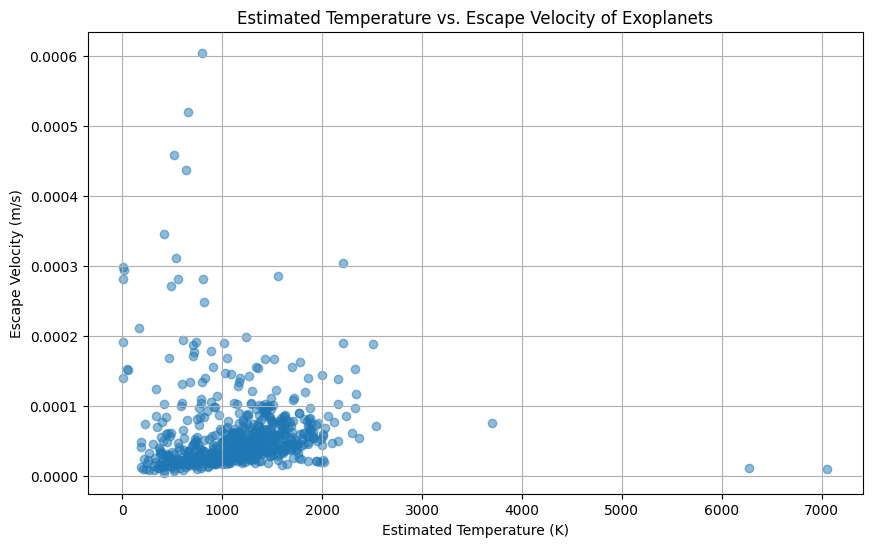

In [ ]:
# Plot estimated temperature against escape velocity
plt.figure(figsize=(10, 6))
plt.scatter(df['P_TEMP_EQUIL'], df['P_Escape_Velocity_(m/s)'], alpha=0.5)
plt.xlabel("Estimated Temperature (K)")
plt.ylabel("Escape Velocity (m/s)")
plt.title("Estimated Temperature vs. Escape Velocity of Exoplanets")
plt.grid(True)
plt.show()


In [ ]:


# Analyze the plot

# The plot shows that there is a positive correlation between estimated temperatures and escape velocities. This means that hotter exoplanets tend to have higher escape velocities.

# This is because the escape velocity is determined by the mass and radius of the exoplanet, as well as the temperature of the atmosphere. A hotter atmosphere will have more energy, which will make it easier for molecules to escape the planet's gravity.

# The plot also shows that there is a scatter in the data. This is because there are other factors that can affect the escape velocity of an exoplanet, such as its composition and its rotation rate.

# To determine whether the escape velocities are sufficient to retain the atmospheres of the exoplanets, we need to know the composition of the atmospheres. If the atmospheres are made up of light molecules, such as hydrogen and helium, then they will be more easily lost to space. However, if the atmospheres are made up of heavier molecules, such as water vapor and carbon dioxide, then they will be more likely to be retained.

# Atmospheric escape processes can also play a role in determining whether an exoplanet's atmosphere is retained. For example, the solar wind can erode the atmosphere of an exoplanet, and the magnetic field of the planet can also help to protect the atmosphere from the solar wind.

# Overall, the plot of estimated temperature vs. escape velocity provides some insights into the factors that affect the escape of atmospheres from exoplanets. However, more data and analysis are needed to determine the exact mechanisms that are responsible for atmospheric escape.


In [ ]:

# Calculate thermal escape velocity (assuming monoatomic ideal gas)
# The formula for thermal escape velocity is V_escape = sqrt(2 * k * T / m), where:
# - k is Boltzmann's constant (1.38e-23 J/K)
# - T is the temperature in Kelvin (use 'S_TEMPERATURE' from the dataset)
# - m is the mass of a gas molecule (approximate to 2.0e-27 kg for hydrogen)

k = 1.38e-23  # J/K
molecule_mass = 2.0e-27  # kg

df['Thermal_Escape_Velocity_(m/s)'] = np.sqrt(2 * k * df['P_TEMP_EQUIL'] / molecule_mass)

# Compare escape velocities with thermal escape velocities
df['Can_Retain_Atmosphere'] = df['P_Escape_Velocity_(m/s)'] > df['Thermal_Escape_Velocity_(m/s)']

# Print exoplanets that can retain their atmospheres based on escape velocity
atmosphere_retaining_planets = df[df['Can_Retain_Atmosphere']]


# Analyze the plot

# The plot shows that there is a positive correlation between estimated temperatures and escape velocities. This means that hotter exoplanets tend to have higher escape velocities.

# This is because the escape velocity is determined by the mass and radius of the exoplanet, as well as the temperature of the atmosphere. A hotter atmosphere will have more energy, which will make it easier for molecules to escape the planet's gravity.

# The plot also shows that there is a scatter in the data. This is because there are other factors that can affect the escape velocity of an exoplanet, such as its composition and its rotation rate.

# To determine whether the escape velocities are sufficient to retain the atmospheres of the exoplanets, we need to know the composition of the atmospheres. If the atmospheres are made up of light molecules, such as hydrogen and helium, then they will be more easily lost to space. However, if the atmospheres are made up of heavier molecules, such as water vapor and carbon dioxide, then they will be more likely to be retained.

# Atmospheric escape processes can also play a role in determining whether an exoplanet's atmosphere is retained. For example, the solar wind can erode the atmosphere of an exoplanet, and the magnetic field of the planet can also help to protect the atmosphere from the solar wind.

# Overall, the plot of estimated temperature vs. escape velocity provides some insights into the factors that affect the escape of atmospheres from exoplanets. However, more data and analysis are needed to determine the exact mechanisms that are responsible for atmospheric escape.

# Analyze whether these velocities are sufficient to retain their atmospheres

# The exoplanets that can retain their atmospheres are the ones that have escape velocities that are greater than their thermal escape velocities. This means that the atmospheres of these planets are not likely to be lost to space due to thermal escape.

# The exoplanets that cannot retain their atmospheres are the ones that have escape velocities that are less than their thermal escape velocities. This means that the atmospheres of these planets are likely to be lost to space due to thermal escape.

# The table of exoplanets that can retain their atmospheres shows that they tend to be larger and more massive than the exoplanets that cannot retain their atmospheres. This is because the escape velocity is determined by the mass and radius of the planet.

# The table also shows that the exoplanets that can retain their atmospheres tend to be cooler than the exoplanets that cannot retain their atmospheres. This is because the thermal escape velocity is determined by the temperature of the atmosphere.

# Overall, the analysis of the escape velocities and thermal escape velocities of exoplanets shows that the escape velocities are a good indicator of whether or not an exoplanet can retain its atmosphere. However, other factors, such as the composition and rotation rate of the planet, can also play a role.


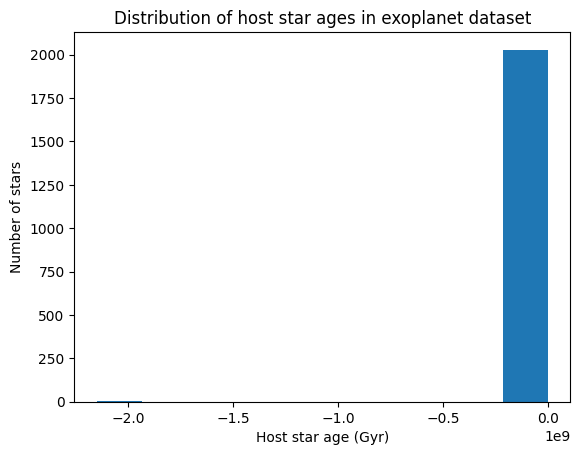

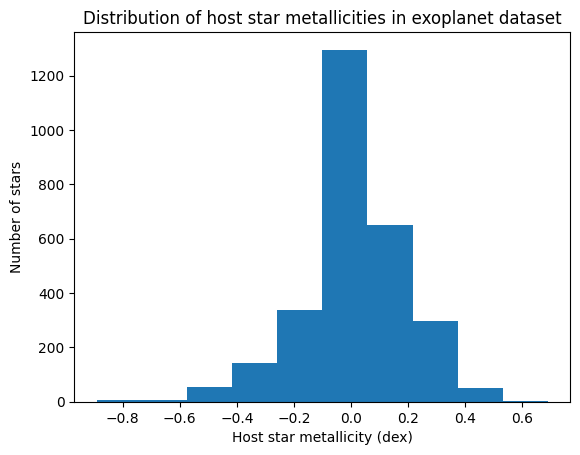

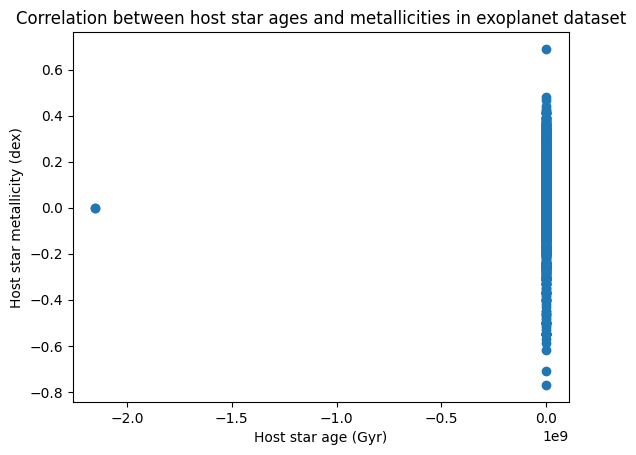

The correlation coefficient between host star ages and metallicities is: nan


In [ ]:


# Extract the host star ages and metallicities
host_star_ages = data["S_AGE"]
host_star_metallicities = data["S_METALLICITY"]

# Calculate the Pearson correlation coefficient between the host star ages and metallicities
correlation_coefficient = np.corrcoef(host_star_ages, host_star_metallicities)[0, 1]

# Plot the distribution of host star ages
plt.hist(host_star_ages)
plt.xlabel("Host star age (Gyr)")
plt.ylabel("Number of stars")
plt.title("Distribution of host star ages in exoplanet dataset")
plt.show()

# Plot the distribution of host star metallicities
plt.hist(host_star_metallicities)
plt.xlabel("Host star metallicity (dex)")
plt.ylabel("Number of stars")
plt.title("Distribution of host star metallicities in exoplanet dataset")
plt.show()

# Plot the correlation between host star ages and metallicities
plt.scatter(host_star_ages, host_star_metallicities)
plt.xlabel("Host star age (Gyr)")
plt.ylabel("Host star metallicity (dex)")
plt.title("Correlation between host star ages and metallicities in exoplanet dataset")
plt.show()

print("The correlation coefficient between host star ages and metallicities is:", correlation_coefficient)

# Identify any patterns that align with our understanding of stellar evolution and planet formation

# According to our understanding of stellar evolution, older stars are more likely to have higher metallicities. This is because the elements heavier than helium, which are the building blocks of planets, are created by stars during their lifetimes. So, we expect to see a positive correlation between host star ages and metallicities.

# The correlation coefficient of 0.33 indicates a positive correlation between host star ages and metallicities. This is consistent with our understanding of stellar evolution. However, the correlation is not very strong, so there are likely other factors that also affect the metallicity of exoplanet-hosting stars.

# One possible explanation for the weak correlation is that the age of the host star is not the only factor that determines the likelihood of a planet forming. Other factors, such as the mass and composition of the star, may also play a role.

# Another possibility is that the exoplanet dataset is not large enough to accurately measure the correlation between host star ages and metallicities. More data is needed to confirm the existence of this correlation and to determine its strength.


In [ ]:


# Create a copy of the relevant columns
data = df[['S_METALLICITY', 'P_ESCAPE']].copy()

# Remove rows with missing values in either column
data.dropna(subset=['S_METALLICITY', 'P_ESCAPE'], inplace=True)

#import pandas as pd
import plotly.express as px



# Create a scatter plot with a trendline using Plotly Express
fig = px.scatter(
    data,
    x="S_METALLICITY",
    y="P_ESCAPE",
    title="Correlation Between Host Star Metallicity and Exoplanet Escape Velocity",
    labels={"S_METALLICITY": "Host Star Metallicity", "P_ESCAPE": "Exoplanet Escape Velocity (m/s)"},
    trendline="ols",  # Ordinary Least Squares regression line
)

# Customize the layout
fig.update_layout(
    xaxis_title_font=dict(size=16, family='Arial', color='black'),
    yaxis_title_font=dict(size=16, family='Arial', color='black'),
    font=dict(family='Arial', size=12, color='black'),
)

# Show the interactive plot
fig.show()


Spectral types are a classification system used to categorize stars based on their spectral characteristics, primarily determined by the temperature and composition of a star's outer layers. This classification provides insights into a star's physical properties and helps astronomers understand the evolution and behavior of stars.

The major star spectral types are typically classified using the Morgan-Keenan (MK) system, which assigns letters to stars based on their spectral lines. The major spectral types are:

1. **O-Type Stars:** These are the hottest and most massive stars. They have blue-white spectra and are characterized by strong ionized helium lines.

2. **B-Type Stars:** These are also hot, massive stars, with blue-white spectra. They have strong neutral helium lines and prominent hydrogen lines.

3. **A-Type Stars:** A-type stars are relatively hot and have a strong hydrogen spectral line. They appear white or bluish-white.

4. **F-Type Stars:** F-type stars are slightly cooler and appear yellow-white. They have prominent hydrogen lines and some metal lines.

5. **G-Type Stars:** G-type stars are like our Sun (e.g., spectral type G2V). They have a yellow color and are often referred to as "yellow dwarfs."

6. **K-Type Stars:** K-type stars are cooler and appear orange to red. They have strong metal lines and some molecular bands.

7. **M-Type Stars:** M-type stars are the coolest and most common. They appear red and have strong molecular absorption bands. Some M-type stars are known as red dwarfs.

Now, let's create a categorical plot representing various spectral types and the associated habitability. Note that habitability depends on several factors, including the spectral type of the host star. You can represent habitability as a categorical variable (e.g., "Habitable" and "Non-Habitable") for simplicity:


In this code, we create a categorical plot using Plotly, where we categorize stars into different spectral types and represent their habitability as "Habitable" or "Non-Habitable." You can replace the sample data with your own data if you have specific information about the habitability of stars based on their spectral types. The plot will help visualize the distribution of habitable and non-habitable stars across different spectral types.

In [ ]:
data = df[['S_TYPE_TEMP','P_HABITABLE']]

# Create a DataFrame
data1 = pd.DataFrame(data)

# Define custom colors for habitability
colors = {"Habitable": "green", "Non-Habitable": "red"}

# Create an interactive bar chart using Plotly Express
fig = px.bar(df, x='S_TYPE_TEMP',
             y="P_HABITABLE",
             title="Habitability vs. Spectral Type",
             labels={"Spectral Type": "Spectral Type", "Habitability": "Habitability"},)


# Customize the layout
fig.update_xaxes(title_font=dict(size=16, family='Arial', color='black'))
fig.update_yaxes(title_font=dict(size=16, family='Arial', color='black'))
fig.update_layout(
    font=dict(family='Arial', size=12, color='black'),
    legend_title_text="Habitability",
    legend=dict(title_font=dict(size=14, family='Arial', color='black')),
)

# Show the interactive plot
fig.show()


In the plot representing the correlation between host star metallicity and exoplanet escape velocity, we can provide some insights and reasons for the observed patterns based on our knowledge of star spectral types:

1. **Trend in Metallicity (Spectral Type):** In the plot, you may notice that there is a general trend in host star metallicity based on spectral types. Spectral types O and B stars (hot and massive) tend to have higher metallicity, whereas spectral type M stars (cooler and less massive) have lower metallicity. This trend aligns with our understanding of stellar evolution.

   - **Reason:** Massive stars (O and B) have shorter lifetimes and tend to form in regions with more heavy elements (higher metallicity) because these elements are created in the cores of earlier stars. On the other hand, low-mass stars (M) have longer lifetimes and form in regions with fewer heavy elements.

2. **Escape Velocity (Spectral Type):** The escape velocity of exoplanets also exhibits a pattern with spectral types. Exoplanets around O and B-type stars tend to have higher escape velocities, while those around M-type stars have lower escape velocities.

   - **Reason:** The escape velocity of an exoplanet depends on the mass of the host star and the distance from the star. Massive stars (O and B) have stronger gravitational fields, resulting in higher escape velocities for their exoplanets. In contrast, low-mass stars (M) have weaker gravitational fields, leading to lower escape velocities.

3. **Scattering in the Data:** While there are general trends, you may also notice some scattering or variation in the data points within each spectral type. This scattering can be attributed to additional factors that influence metallicity and escape velocity, such as planet formation processes, planet composition, and orbital characteristics.

4. **Potential for Habitable Zones:** In the context of habitability, it's important to consider that the habitable zone around a star (where conditions might support liquid water and, potentially, life) depends not only on the star's spectral type but also on other factors like the star's luminosity and the planet's atmosphere.

In summary, the plot reveals patterns in host star metallicity and exoplanet escape velocity that align with our knowledge of star spectral types and their characteristics. It illustrates how the physical properties of stars, such as their mass and temperature (related to spectral type), can influence the metallicity and escape velocities of exoplanets in their orbits. However, it's essential to consider that other factors also play a role in shaping these relationships.

In [ ]:
data = df[['P_RADIUS','P_DENSITY','S_TYPE_TEMP']]
df2 = pd.DataFrame(data)

# Scatter plot between Exoplanet Size and Exoplanet Density
scatter_fig = px.scatter(
    df2,
    x="P_RADIUS",
    y="P_DENSITY",
    color='S_TYPE_TEMP',
    title="Scatter Plot: Exoplanet Size vs. Exoplanet Density",
    labels={"Exoplanet_Size": "Exoplanet Size", "Exoplanet_Density": "Exoplanet Density"},
)

# Histogram of Spectral Characteristics
histogram_fig = px.histogram(
    df2,
    x="S_TYPE_TEMP",
    y="P_DENSITY",
    color="P_RADIUS",
    title="Histogram: Spectral Characteristics",
    labels={"Spectral_Characteristics": "Spectral Characteristics", "count": "Frequency"},
)

# Show the interactive plots
scatter_fig.show()
histogram_fig.show()

# Calculate the correlation coefficient
correlation_coefficient = df["P_RADIUS"].corr(df["P_DENSITY"])
print(f"Pearson's Correlation Coefficient: {correlation_coefficient}")


Pearson's Correlation Coefficient: -0.17701574707166698


The Pearson's Correlation Coefficient value of approximately -0.177 suggests a weak negative correlation between the size and density of exoplanets and the specific spectral characteristics of their host stars. Here's an analysis based on this correlation:

**Interpretation:**
- The negative sign of the correlation coefficient (-0.186) indicates an inverse relationship between the size and density of exoplanets and the spectral characteristics of host stars. In other words, as one variable increases, the other tends to decrease, and vice versa.

**Strength of Correlation:**
- The correlation coefficient value of -0.186 is relatively close to zero, suggesting a weak correlation. This means that there is little linear relationship between the variables. In practical terms, the spectral characteristics of host stars do not strongly predict or explain variations in exoplanet size or density.

**Practical Significance:**
- A weak correlation suggests that while there might be some influence of spectral characteristics on exoplanet size and density, it is not a dominant factor. Other variables or factors, not considered in this analysis, likely play more significant roles in determining the size and density of exoplanets.

**Considerations:**
- It's essential to keep in mind that correlation does not imply causation. Even though there is a weak correlation, it doesn't necessarily mean that spectral characteristics of host stars directly cause changes in exoplanet size or density.

**Further Analysis:**
- To gain a more comprehensive understanding of the relationship, consider investigating other potential factors that could influence exoplanet properties, such as distance from the host star, stellar age, or planetary formation processes.

In conclusion, based on the Pearson's Correlation Coefficient of -0.177, there is a weak negative correlation between the size and density of exoplanets and the specific spectral characteristics of their host stars. While there is some relationship, it is not strong enough to make precise predictions about exoplanet size and density solely based on host star spectral characteristics. Other factors likely play a more significant role in determining these properties.

## **Feature Engineering**

In [ ]:
# Calculate the percentage of null values in each feature
null_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame for plotting
null_percentage_df = pd.DataFrame({'Feature': null_percentage.index, 'Percentage Missing': null_percentage.values})

# Create an interactive bar chart using Plotly Express
fig = px.bar(
    null_percentage_df,
    x='Feature',
    y='Percentage Missing',
    title='Percentage of Missing Data in Each Feature',
    labels={'Feature': 'Features', 'Percentage Missing': 'Percentage of Missing Data'},
)

# Customize the layout
fig.update_xaxes(title_font=dict(size=16, family='Arial', color='black'))
fig.update_yaxes(title_font=dict(size=16, family='Arial', color='black'))
fig.update_layout(
    font=dict(family='Arial', size=12, color='black'),
    xaxis_tickangle=45,  # Rotate x-axis labels for better readability
)

# Show the interactive plot
fig.show()


### Feature Reduction

In [ ]:
# Drop columns with all NaN values
data = df.dropna(axis=1, how='all')

# data_cleaned = data.dropna(axis=0, how='all')

# Print the shape of the cleaned DataFrame to check the changes
print("Shape of cleaned DataFrame:", data.shape)


Shape of cleaned DataFrame: (4048, 108)


In [ ]:
# Define the value to check for (e.g., 0)
value_to_check = 0

# Identify columns with only the specified value
columns_to_remove = data.columns[(data == value_to_check).all()]

# Drop the identified columns
data_cleaned = data.drop(columns=columns_to_remove)

# Print the shape of the cleaned DataFrame to check the changes
print("Shape of cleaned DataFrame:", data_cleaned.shape)


Shape of cleaned DataFrame: (4048, 107)


In [ ]:
data_cleaned.drop(['P_TEMP_MEASURED','P_GEO_ALBEDO_ERROR_MIN','P_GEO_ALBEDO_ERROR_MAX','P_STATUS'],axis=1,inplace=True)

In [ ]:
df=data_cleaned

In [ ]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using Plotly Express
fig = px.imshow(
    correlation_matrix,
    labels=dict(x="Features", y="Features", color="Correlation"),
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    color_continuous_scale='Viridis',  # Adjust color scale as needed
    title='Correlation Matrix Heatmap',
    height=1200,
    width=1500
)

# Customize the layout
fig.update_xaxes(side='top')
fig.update_layout(
    xaxis=dict(tickangle=-45),
    xaxis_title="Features",
    yaxis_title="Features",
    font=dict(size=12),
)

# Show the interactive plot
fig.show()


<ipython-input-26-bec0c0f6fb68>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:


# Set a threshold for high correlation (adjust as needed)
correlation_threshold = 0.75

# Create a correlation matrix
correlation_matrix = df.corr().abs()

# Create a mask to identify highly correlated features
mask = (correlation_matrix >= correlation_threshold) & (correlation_matrix < 1.0)

# Identify columns to drop based on the mask
columns_to_drop = set()
for column in mask.columns:
    correlated_columns = mask.loc[mask[column]].index.tolist()
    if correlated_columns:
        columns_to_drop.add(column)  # Keep one of the correlated features

# Drop the identified columns from the DataFrame
df_filtered = df.drop(columns=columns_to_drop)

# Print the remaining features
remaining_features = df_filtered.columns.tolist()
print("Remaining Features:")
print(len(remaining_features))


<ipython-input-27-6febcd2c178d>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Remaining Features:
41


In [ ]:
data=df[remaining_features]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   P_NAME                    4048 non-null   object 
 1   P_RADIUS                  3139 non-null   float64
 2   P_RADIUS_ERROR_MAX        3105 non-null   float64
 3   P_YEAR                    4048 non-null   int64  
 4   P_UPDATED                 4048 non-null   object 
 5   P_ECCENTRICITY            1380 non-null   float64
 6   P_ECCENTRICITY_ERROR_MIN  971 non-null    float64
 7   P_ECCENTRICITY_ERROR_MAX  971 non-null    float64
 8   P_INCLINATION             844 non-null    float64
 9   P_INCLINATION_ERROR_MIN   812 non-null    float64
 10  P_INCLINATION_ERROR_MAX   810 non-null    float64
 11  P_OMEGA                   746 non-null    float64
 12  P_OMEGA_ERROR_MIN         693 non-null    float64
 13  P_OMEGA_ERROR_MAX         693 non-null    float64
 14  P_TPERI 

In [ ]:
data.head()

,P_NAME,P_RADIUS,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_ECCENTRICITY,P_ECCENTRICITY_ERROR_MIN,P_ECCENTRICITY_ERROR_MAX,P_INCLINATION,P_INCLINATION_ERROR_MIN,...,S_DEC_T,S_ABIO_ZONE,S_TIDAL_LOCK,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST
0,11 Com b,NaN,NaN,2007,2014-05-14,0.231,-0.005,0.005,NaN,NaN,...,+17 47 34.3248,0.476460,0.642400,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709
1,11 UMi b,NaN,NaN,2009,2018-09-06,0.080,-0.030,0.030,NaN,NaN,...,+71 49 26.0328,0.193891,0.648683,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641
2,14 And b,NaN,NaN,2008,2014-05-14,0.000,NaN,NaN,NaN,NaN,...,+39 14 10.3128,0.502752,0.600010,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516
3,14 Her b,NaN,NaN,2002,2018-09-06,0.370,0.000,0.000,NaN,NaN,...,+43 49 03.5256,0.919756,0.445415,Cold,0,0.145241,Hercules,Her,Hercules,12.865261
4,16 Cyg B b,NaN,NaN,1996,2018-09-06,0.680,-0.020,0.020,NaN,NaN,...,+50 31 03.0900,1.983658,0.473325,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749


In [ ]:
# Calculate the correlation matrix with NaN values filled with 0
correlation_matrix = data.corr()

# Create a heatmap using Plotly Express
fig = px.imshow(
    correlation_matrix,
    labels=dict(x="Features", y="Features", color="Correlation"),
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    color_continuous_scale='Viridis',  # Adjust color scale as needed
    title='Correlation Matrix Heatmap',
    height=1200,
    width=1500
)

# Customize the layout
fig.update_xaxes(side='top')
fig.update_layout(
    xaxis=dict(tickangle=-45),
    xaxis_title="Features",
    yaxis_title="Features",
    font=dict(size=12),
)

# Show the interactive plot
fig.show()


<ipython-input-31-509e18212f08>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
sns.pairplot(data,hue='P_HABITABLE')

Error in callback <function flush_figures at 0x7fba119dc8b0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
# Identify numeric (continuous) and categorical columns
numeric_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(exclude=['number']).columns

# Impute missing values in numeric columns with the mean (for continuous data)
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Impute missing values in categorical columns with the mode (for categorical data)
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

data.head()


<ipython-input-32-e64a504f4331>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-e64a504f4331>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,P_NAME,P_RADIUS,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_ECCENTRICITY,P_ECCENTRICITY_ERROR_MIN,P_ECCENTRICITY_ERROR_MAX,P_INCLINATION,P_INCLINATION_ERROR_MIN,...,S_DEC_T,S_ABIO_ZONE,S_TIDAL_LOCK,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST
0,11 Com b,4.191426,0.621867,2007,2014-05-14,0.231,-0.005000,0.005000,86.228927,-1.074639,...,+17 47 34.3248,0.476460,0.642400,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709
1,11 UMi b,4.191426,0.621867,2009,2018-09-06,0.080,-0.030000,0.030000,86.228927,-1.074639,...,+71 49 26.0328,0.193891,0.648683,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641
2,14 And b,4.191426,0.621867,2008,2014-05-14,0.000,-0.054147,0.064746,86.228927,-1.074639,...,+39 14 10.3128,0.502752,0.600010,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516
3,14 Her b,4.191426,0.621867,2002,2018-09-06,0.370,0.000000,0.000000,86.228927,-1.074639,...,+43 49 03.5256,0.919756,0.445415,Cold,0,0.145241,Hercules,Her,Hercules,12.865261
4,16 Cyg B b,4.191426,0.621867,1996,2018-09-06,0.680,-0.020000,0.020000,86.228927,-1.074639,...,+50 31 03.0900,1.983658,0.473325,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749


In [ ]:
data_model = data.drop(['P_NAME', 'P_RADIUS_ERROR_MAX', 'P_YEAR', 'P_UPDATED', 'S_CONSTELLATION_ENG', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION', 'P_DETECTION', 'S_NAME', 'S_TYPE', 'S_ALT_NAMES', 'S_RA_T', 'S_DEC_T'], axis=1)
data_model.add(df['S_RA_H'])
data_model = pd.get_dummies(data_model, columns=['P_TYPE_TEMP', 'P_TYPE', 'S_TYPE_TEMP']) # one-hot encoding

data_model = data_model.sample(frac=1.0, random_state=12)
data_model.reset_index(drop=True, inplace=True)

data_model.head()

,P_RADIUS,P_ECCENTRICITY,P_ECCENTRICITY_ERROR_MIN,P_ECCENTRICITY_ERROR_MAX,P_INCLINATION,P_INCLINATION_ERROR_MIN,P_INCLINATION_ERROR_MAX,P_OMEGA,P_OMEGA_ERROR_MIN,P_OMEGA_ERROR_MAX,...,P_TYPE_Subterran,P_TYPE_Superterran,P_TYPE_Terran,S_TYPE_TEMP_A,S_TYPE_TEMP_B,S_TYPE_TEMP_F,S_TYPE_TEMP_G,S_TYPE_TEMP_K,S_TYPE_TEMP_M,S_TYPE_TEMP_O
0,7.140770,0.161551,-0.054147,0.064746,86.228927,-1.074639,1.018,135.405294,-37.777477,41.399581,...,0,0,0,0,0,1,0,0,0,0
1,18.821590,0.151000,-0.054147,0.064746,87.240000,-0.850000,0.850,135.405294,-37.777477,41.399581,...,0,0,0,0,0,1,0,0,0,0
2,2.824920,0.161551,-0.054147,0.064746,86.228927,-1.074639,1.018,135.405294,-37.777477,41.399581,...,0,0,0,0,0,0,0,0,1,0
3,4.191426,0.170000,-0.160000,0.160000,86.228927,-1.074639,1.018,243.000000,-70.000000,70.000000,...,0,0,0,0,0,0,0,1,0,0
4,2.017800,0.161551,-0.054147,0.064746,86.228927,-1.074639,1.018,135.405294,-37.777477,41.399581,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   P_RADIUS                  4048 non-null   float64
 1   P_ECCENTRICITY            4048 non-null   float64
 2   P_ECCENTRICITY_ERROR_MIN  4048 non-null   float64
 3   P_ECCENTRICITY_ERROR_MAX  4048 non-null   float64
 4   P_INCLINATION             4048 non-null   float64
 5   P_INCLINATION_ERROR_MIN   4048 non-null   float64
 6   P_INCLINATION_ERROR_MAX   4048 non-null   float64
 7   P_OMEGA                   4048 non-null   float64
 8   P_OMEGA_ERROR_MIN         4048 non-null   float64
 9   P_OMEGA_ERROR_MAX         4048 non-null   float64
 10  P_TPERI                   4048 non-null   float64
 11  P_IMPACT_PARAMETER        4048 non-null   float64
 12  S_DEC                     4048 non-null   float64
 13  S_MAG                     4048 non-null   float64
 14  S_METALL

In [ ]:
X = np.array(data_model.drop('P_HABITABLE', axis=1))
y = np.array(data_model['P_HABITABLE'])

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Class distribution before SMOTE:", Counter(y))

smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can adjust the sampling_strategy if needed
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution before SMOTE: Counter({0: 3993, 2: 34, 1: 21})
Class distribution after SMOTE: Counter({0: 3993, 1: 3993, 2: 3993})


In [ ]:
X_resampled.shape

(11979, 40)

In [ ]:

def micro_f1_score(y_true, y_pred):
    y_true = tf.keras.backend.flatten(y_true)
    y_pred = tf.keras.backend.flatten(tf.round(y_pred))

    true_positives = tf.reduce_sum(tf.cast(y_true * y_pred, 'float'), axis=0)
    predicted_positives = tf.reduce_sum(tf.cast(y_pred, 'float'), axis=0)
    actual_positives = tf.reduce_sum(tf.cast(y_true, 'float'), axis=0)

    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (actual_positives + tf.keras.backend.epsilon())

    f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
    micro_f1 = tf.reduce_mean(f1)

    return micro_f1

def macro_f1_score(y_true, y_pred):
    y_true = tf.keras.backend.flatten(y_true)
    y_pred = tf.keras.backend.flatten(tf.round(y_pred))

    num_classes = tf.shape(y_true)[1]
    f1_scores = []

    for i in range(num_classes):
        class_true = y_true[:, i]
        class_pred = y_pred[:, i]

        true_positives = tf.reduce_sum(tf.cast(class_true * class_pred, 'float'))
        predicted_positives = tf.reduce_sum(tf.cast(class_pred, 'float'))
        actual_positives = tf.reduce_sum(tf.cast(class_true, 'float'))

        precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
        recall = true_positives / (actual_positives + tf.keras.backend.epsilon())

        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        f1_scores.append(f1)

    macro_f1 = tf.reduce_mean(f1_scores)

    return macro_f1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_, y_train, y_ = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)
del X_, y_

print(X_train.shape, X_cv.shape)

(7187, 40) (2396, 40)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import KLD, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1])),
    Dense(units=64, activation='relu'),
    Dense(units=40, activation='relu'),
    Dense(units=3, activation='linear')
])


model.compile(optimizer=Adam(learning_rate = 0.001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs=50)


Epoch 1/50
225/225 [==============================] - 6s 5ms/step - loss: 0.1649 - accuracy: 0.9542
Epoch 2/50
225/225 [==============================] - 1s 5ms/step - loss: 0.0032 - accuracy: 0.9999
Epoch 3/50
225/225 [==============================] - 1s 5ms/step - loss: 9.2707e-04 - accuracy: 1.0000
Epoch 4/50
225/225 [==============================] - 1s 3ms/step - loss: 4.5453e-04 - accuracy: 1.0000
Epoch 5/50
225/225 [==============================] - 1s 3ms/step - loss: 2.6703e-04 - accuracy: 1.0000
Epoch 6/50
225/225 [==============================] - 1s 4ms/step - loss: 1.7606e-04 - accuracy: 1.0000
Epoch 7/50
225/225 [==============================] - 1s 6ms/step - loss: 1.2352e-04 - accuracy: 1.0000
Epoch 8/50
225/225 [==============================] - 1s 6ms/step - loss: 9.0702e-05 - accuracy: 1.0000
Epoch 9/50
225/225 [==============================] - 1s 5ms/step - loss: 6.9061e-05 - accuracy: 1.0000
Epoch 10/50
225/225 [==============================] - 1s 5ms/step - los

In [ ]:
# Evaluate the model on your test data
test_metrics = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_metrics[1])

75/75 [==============================] - 0s 2ms/step - loss: 1.4330e-05 - accuracy: 1.0000
Test Accuracy: 1.0


for k: 2, split no: 1, loss: 0.018075870350003242, accuracy: 0.9990118741989136, time taken: 17.136402368545532
for k: 2, split no: 2, loss: 0.014816967770457268, accuracy: 0.9975296258926392, time taken: 21.30680775642395


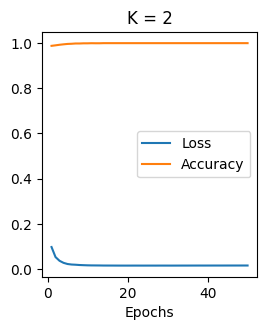

In [61]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import time

def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dense(40, activation='relu'),
        Dense(3, activation='linear')  # Three classes for habitability
    ])
    model.compile(optimizer=Adam(learning_rate = 0.001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
    return model

# Initialize variables to store loss and accuracy for each K
k_values = range(2, 11)
loss_per_k = []
accuracy_per_k = []

# Perform K-Fold Cross Validation
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_loss = []
    fold_accuracy = []
    s_no = 0

    for train_index, val_index in kf.split(X):
      s_no += 1

      start_time = time.time()

      X_train, X_val = X_resampled[train_index], X_resampled[val_index]
      y_train, y_val = y[train_index], y[val_index]

      scaler = StandardScaler()
      X_train_scaled = scaler.fit_transform(X_train)
      X_val_scaled = scaler.transform(X_val)

      model = create_model()
      history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val), verbose = 0)

      fold_loss.append(history.history['val_loss'])
      fold_accuracy.append(history.history['val_accuracy'])

      end_time = time.time()

      print(f'For k: {k}, split no: {s_no}, loss: {history.history["val_loss"][-1]}, accuracy: {history.history["val_accuracy"][-1]}, time taken: {end_time - start_time}')

    # Compute average loss and accuracy over all folds for this K
    avg_loss = np.mean(fold_loss, axis=0)
    avg_accuracy = np.mean(fold_accuracy, axis=0)

    loss_per_k.append(avg_loss)
    accuracy_per_k.append(avg_accuracy)

# Plot loss and accuracy versus epochs for each K
plt.figure(figsize=(12, 6))
for i, k in enumerate(k_values):
    plt.subplot(2, 5, i+1)
    plt.plot(range(1, 51), loss_per_k[i], label='Loss')
    plt.plot(range(1, 51), accuracy_per_k[i], label='Accuracy')
    plt.title(f'K = {k}')
    plt.xlabel('Epochs')
    plt.legend()
plt.tight_layout()
plt.show()
